In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fitter import Fitter, get_common_distributions

In [7]:
# reading data
#df = pd.read_csv('../github/hidden_features_df.csv', index_col="Unnamed: 0")
df = pd.read_csv('hidden_features_df.csv', index_col="Unnamed: 0")

In [8]:
# showing 5 first registers
df.head(5) 

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,8,0.0,11.246423,0.0,7.995950,9.410959,19.745337,9.010060,8.527996,10.110795,19.589340
1,8,0.0,13.312637,0.0,10.743755,11.378502,18.715256,11.810072,11.065614,12.528616,18.708977
2,5,0.0,0.000000,0.0,0.000000,0.000000,28.648830,0.000000,0.000000,0.000000,30.524609
3,5,0.0,0.000000,0.0,0.000000,0.000000,26.991035,0.000000,0.000000,0.000000,29.041384
4,8,0.0,5.038842,0.0,5.323320,5.368689,22.266983,4.806798,4.124915,4.903548,23.818264


In [9]:
# checking if feature_1 and feature_3 have all zeros
counts_feature1 = df.groupby('feature_1')['feature_1'].value_counts()
print(counts_feature1)

counts_feature3 = df.groupby('feature_3')['feature_3'].value_counts()
print(counts_feature3)

feature_1  feature_1
0.0        0.0          9370
Name: feature_1, dtype: int64
feature_3  feature_3
0.0        0.0          9370
Name: feature_3, dtype: int64


In [8]:
# dropping feature_1 and feature_3
df = df.drop(['feature_1', 'feature_3'], axis=1)

In [9]:
distributions_set = get_common_distributions()
distributions_set.extend(['beta','arcsine', 'cosine', 'expon', 'weibull_max', 'weibull_min', 
                          'dweibull', 't', 'pareto', 'exponnorm', 'lognorm',
                         "norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"])  

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 13.71it/s]


Summary for feature_2:
{'expon': (0.0, 0.1121212821714638), 'norm': (0.1121212821714638, 0.458466802283615), 'uniform': (0.0, 5.619933128356934), 'rayleigh': (-0.438034283441322, 0.5063906373398346), 'cauchy': (1.866761728609896e-24, 3.4517496846267554e-23), 'powerlaw': (0.19368223673424528, -1.7038557454604956e-26, 10.733953225486223), 'gamma': (0.21055267303348418, -7.631541155653315e-30, 1.5351779341995573), 'arcsine': (-5.470076234591372e-29, 5.83992554087677), 'chi2': (1.5264675726831718, -4.419622608504961e-29, 0.39555791462637047), 'cosine': (0.8808123299655282, 1.509332944389401), 'exponpow': (0.038622341759667785, -1.2409909744379611e-29, 1.7108536757198267), 'beta': (0.11892021579434976, 149.75738350380507, -8.340564036160939e-27, 13.293757265446898), 'weibull_max': (0.5405129857998797, 5.619933128356935, 1.4099913759436664), 'pareto': (2.970399495167051, -1.0331729712334746e-18, 1.0198320423905905e-18), 'weibull_min': (0.16434825616078624, -4.75414666165972e-28, 0.0670094842

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 15.70it/s]

Summary for feature_2:
{'expon': (0.9854184985160828, 8.870839208945727), 'norm': (9.85625770746181, 2.4578414200078336), 'uniform': (0.9854184985160828, 16.51402074098587), 'rayleigh': (5.60246453422445, 3.473884051503942), 'cauchy': (10.039740550021845, 1.5353012456842734), 'cosine': (9.317837461360567, 2.6551334714688153), 'beta': (14.821670613196302, 7.86665989995932, -6.550395691165864, 25.11405852884259), 'powerlaw': (1.493648957219507, 0.981769103705779, 16.517670239170407), 'gamma': (363.93080373838495, -37.71056565751774, 0.13070742539308622), 'arcsine': (0.9854184985160827, 16.636693381792803), 'dweibull': (1.2885383080376265, 10.091077719559934, 2.1339843239223644), 'chi2': (211.91075570637486, -16.20621200555677, 0.12293503145500295), 'exponnorm': (0.00012945043340268367, 9.85590234541083, 2.457818139190885), 'pareto': (0.6307567922773518, -1.2421359947992643, 2.227554488987257), 'weibull_max': (3.4075129930660792, 17.563549112386607, 8.576317509790599), 'exponpow': (0.4543

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,109.605780,4578.734835,-16695.703487,inf,0.897311,0.0
exponnorm,109.684787,4582.496144,-16684.050037,inf,0.895815,0.0
exponweib,126.794306,2184.040858,-16023.483844,inf,0.897311,0.0
gamma,162.272125,799.285391,-14921.953565,inf,0.897310,0.0
beta,174.784376,7922.452447,-14579.363578,inf,0.896192,0.0


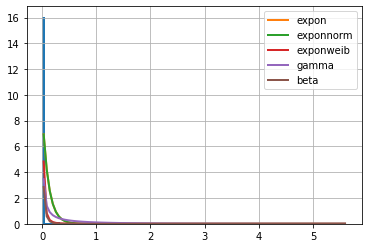

In [28]:
data5 = df[df['label']==5]['feature_2']
data8 = df[df['label']==8]['feature_2']
f5 = Fitter(data5, distributions = distributions_set)
f5.fit()
print(f"Summary for feature_2:")
print(f5.fitted_param)
f8 = Fitter(data8, distributions = distributions_set)
f8.fit()
print(f"Summary for feature_2:")
print(f8.fitted_param)
f5.summary()


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.004636,781.860520,-67501.890917,inf,0.006421,0.987261
exponweib,0.004678,773.978221,-67457.926262,inf,0.006956,0.971188
weibull_min,0.004764,765.138814,-67377.570257,inf,0.007063,0.966856
genextreme,0.008748,774.315170,-64417.535365,inf,0.023545,0.008882
weibull_max,0.008748,774.321140,-64417.521603,inf,0.023546,0.008878


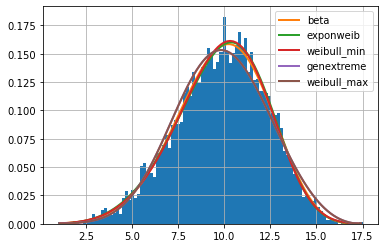

In [11]:
f8.summary()

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:02<00:00, 13.24it/s]


Summary for feature_4 5:
{'expon': (0.0, 0.08783093540386694), 'norm': (0.08783093540386694, 0.3893895683341553), 'uniform': (0.0, 5.191310882568359), 'rayleigh': (-0.3743975827014172, 0.42736368521276275), 'cauchy': (-2.2680028168285757e-24, 7.629958360329562e-24), 'powerlaw': (0.19368202169999663, -3.1535682931677252e-27, 9.91529384105381), 'gamma': (0.18087882053658627, -5.782758412730735e-31, 1.4067646940350533), 'arcsine': (-4.6055432580708056e-29, 5.394524867786138), 'cosine': (0.8043259066822105, 1.3971759224007365), 'chi2': (1.5264673431320475, -2.4173100130395544e-28, 0.33595924190354115), 'exponpow': (0.22034705507244562, -8.801323349221499e-29, 1.8103064081980045), 'beta': (0.2711632488092937, 465.4069516854168, -1.928413426685931e-26, 25.764003196808677), 'weibull_min': (0.4844673576924981, -5.344856002919921e-30, 0.004737714458005266), 'pareto': (2.8893643240436715, -1.148336173476659e-17, 1.005830421702573e-17), 't': (2.1212919059532958, 8.127294096151833e-22, 7.107123748

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 19.61it/s]

Summary for feature_4 8:
{'expon': (1.3224902153015137, 7.61306819399875), 'norm': (8.935558409300263, 1.9896866981127013), 'uniform': (1.3224902153015137, 12.310154438018799), 'rayleigh': (12.996922017521488, 3.1979311683360496), 'cauchy': (9.230569866354326, 1.2065290058051186), 'powerlaw': (2.191804287800578, 0.09212726895179175, 13.540517388805156), 'cosine': (8.343533969632478, 2.2369340028030793), 'gamma': (252.12968945034663, -23.463680531340728, 0.12845119478354017), 'beta': (16.236326591296894, 5.212638487058973, -7.674774884350769, 21.942586783183785), 'weibull_max': (2.5462528732390024, 13.681293780845706, 5.348042737703144), 'exponpow': (3.383722027347666, 1.1125368049026365, 9.746818509235425), 'arcsine': (0.08978876854559592, 13.542855884774719), 'chi2': (398.11761312441877, -19.839254601101814, 0.07221639169986852), 'dweibull': (1.2902949422584913, 8.97711539947884, 1.7176979137379078), 'weibull_min': (7.84328510846356, -4.148492022080706, 13.913550860468163), 'exponnorm

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,115.177347,5428.103936,-16472.629664,inf,0.911980,0.0
exponnorm,115.276283,5432.349354,-16460.355153,inf,0.910501,0.0
beta,139.788602,10244.566497,-15584.538185,inf,0.911980,0.0
weibull_min,177.901612,3700.146499,-14508.243764,inf,0.911980,0.0
gamma,201.889343,819.993273,-13939.169372,inf,0.911977,0.0


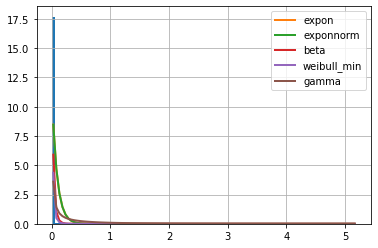

In [12]:
data5 = df[df['label']==5]['feature_4']
data8 = df[df['label']==8]['feature_4']
f5 = Fitter(data5, distributions = distributions_set)
f5.fit()
print(f"Summary for feature_4 5:")
print(f5.fitted_param)
f8 = Fitter(data8, distributions = distributions_set)
f8.fit()
print(f"Summary for feature_4 8:")
print(f8.fitted_param)
f5.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponweib,0.012300,666.837769,-62749.495077,inf,0.008903,0.831361
beta,0.013329,669.418117,-62358.064307,inf,0.011658,0.518345
weibull_min,0.013471,660.260133,-62314.936144,inf,0.011833,0.498986
exponpow,0.016025,678.235295,-61469.385723,inf,0.023012,0.011315
weibull_max,0.020354,675.387051,-60304.564410,inf,0.023631,0.008537


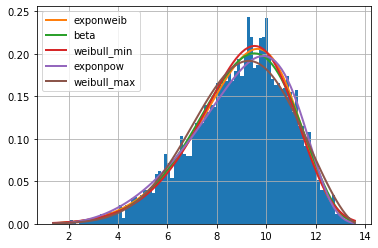

In [13]:
f8.summary()

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:02<00:00, 12.93it/s]


Summary for feature_5:
{'expon': (0.0, 0.11927207134486861), 'norm': (0.11927207134486861, 0.4524920989440384), 'uniform': (0.0, 5.289931774139404), 'rayleigh': (-0.4291949688112874, 0.5027748968198571), 'cauchy': (1.1678646835596567e-22, 1.1772162301579153e-22), 'powerlaw': (0.19368165002680598, -9.008584997707885e-28, 10.103657699895205), 'arcsine': (-1.061958078544515e-27, 5.497006268853561), 'cosine': (0.8379652093086349, 1.4178876337912822), 'gamma': (0.234027978547675, -1.2164610532628385e-30, 1.4371705203918088), 'chi2': (1.5264675743237497, -1.929137006398688e-28, 0.3904030343565868), 'exponpow': (0.03862237538158805, -3.7963916113866155e-30, 1.688557949203743), 'beta': (0.21602060508177978, 625.918439600516, -4.8466346394266585e-26, 49.46829100097167), 'pareto': (2.8840370919072598, -3.216785027431152e-19, 2.830367304588994e-19), 't': (2.120531111537619, 3.372337079078088e-22, 6.624604440141454e-21), 'weibull_min': (0.4929096836685374, -2.797055376485102e-29, 0.020080344411521

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 16.94it/s]

Summary for feature_5:
{'expon': (1.9329725503921509, 7.24000502655673), 'norm': (9.172977576948881, 2.195882155920625), 'uniform': (1.9329725503921509, 14.093676924705505), 'rayleigh': (6.1713542084260595, 2.6297947913433193), 'cauchy': (9.419229934137881, 1.361370859400394), 'powerlaw': (1.6069307232038557, 0.5249211184551601, 15.501728381420257), 'cosine': (8.976957018835254, 2.251191168570001), 'gamma': (283.6776702934162, -28.45993094961416, 0.13270612658596104), 'exponpow': (2.8280289387846094, 1.676371556325134, 9.65974706382876), 'arcsine': (1.9329725503921507, 14.214315250981635), 'weibull_min': (5.758270951267255, -1.6659233056841125, 11.715771904288832), 'chi2': (291.1882388344668, -18.15844360658835, 0.09387559518890787), 'exponnorm': (0.0005438091544673347, 9.171780600701966, 2.1958810339071273), 'dweibull': (1.3038598435089856, 9.153225635158266, 1.9124604478225429), 'pareto': (0.6559903640860091, -0.0001342111250050834, 1.9331067597973273), 'beta': (23.52168539780558, 8.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,102.521639,1920.418343,-16987.898044,inf,0.881974,0.0
exponnorm,129.638396,4046.120820,-15932.094720,inf,0.881023,0.0
expon,130.293110,4013.910988,-15917.842153,inf,0.881974,0.0
beta,138.223768,7226.255280,-15635.185285,inf,0.881967,0.0
exponweib,166.399810,1127.129584,-14800.533031,inf,0.881974,0.0


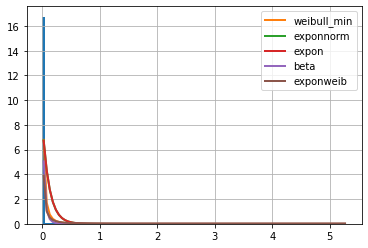

In [14]:
data5 = df[df['label']==5]['feature_5']
data8 = df[df['label']==8]['feature_5']
f5 = Fitter(data5, distributions = distributions_set)
f5.fit()
print(f"Summary for feature_5:")
print(f5.fitted_param)
f8 = Fitter(data8, distributions = distributions_set)
f8.fit()
print(f"Summary for feature_5:")
print(f8.fitted_param)
f5.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponweib,0.010320,737.415418,-63604.363075,inf,0.008578,0.862888
weibull_min,0.011222,719.221773,-63204.640296,inf,0.010908,0.604250
beta,0.011434,741.928416,-63105.116587,inf,0.010726,0.625519
exponpow,0.014233,803.001304,-62046.829872,inf,0.019112,0.056234
genextreme,0.023179,708.821489,-59671.457060,inf,0.031877,0.000098


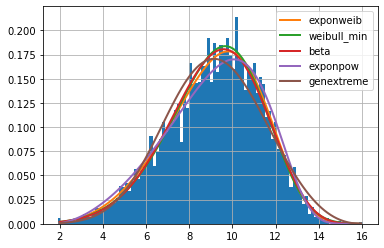

In [15]:
f8.summary()

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 15.81it/s]


Summary for feature_6:
{'expon': (13.957436561584473, 12.515098259750538), 'norm': (26.47253482133501, 3.7054163025264026), 'uniform': (13.957436561584473, 23.596816062927246), 'rayleigh': (21.62714328976854, 4.313231333304795), 'cauchy': (26.801420686630294, 2.3295763372812086), 'cosine': (25.838039384070328, 3.788882314836565), 'chi2': (0.7040248718111277, 13.957436561584469, 1.4100527051284388), 'gamma': (321.5294977315617, -40.777831995192216, 0.20917418728916598), 'beta': (14.256280670273213, 6.9058459231954, 1.4546109554020226, 37.135419839346206), 'powerlaw': (1.4131407272472671, 13.952226675946868, 23.68195534884886), 'arcsine': (13.95743656158447, 23.604807307121987), 'dweibull': (1.3100008756881574, 26.56966905892009, 3.234229365213234), 'exponnorm': (0.0005286969183763065, 26.470579287884984, 3.7054102799319715), 'pareto': (1.5905408720967615, -0.029063013818050966, 13.986499571186197), 'weibull_min': (0.35618375583191597, 13.957436561584469, 1.3733955360620271), 'exponpow':

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 17.21it/s]

Summary for feature_6:
{'expon': (9.597055435180664, 7.549531469499765), 'norm': (17.14658690468043, 2.2854513232457583), 'uniform': (9.597055435180664, 16.341176986694336), 'rayleigh': (12.918260959180353, 3.3986782763535364), 'cauchy': (17.036920315121243, 1.3921477798708066), 'gamma': (144.92877644080028, -10.367873376075659, 0.1898481517805582), 'cosine': (17.69848898952936, 2.625254936032308), 'powerlaw': (1.0035805276089644, 9.59704358191059, 16.34121408169021), 'arcsine': (9.596448513139537, 16.34178390873547), 'dweibull': (1.2690323249691335, 17.197432577990174, 1.959289964303712), 'chi2': (87.34785507111093, 1.8785876902826812, 0.17448728388571527), 'exponnorm': (0.45736157807208655, 16.19534736124274, 2.079826693946838), 'exponpow': (2.413597185503285, 9.579346955254499, 10.073762082618014), 'weibull_min': (3.6728033371978244, 9.439098155419954, 8.534180517281452), 'pareto': (1.751789913813643, -0.015239503528790997, 9.612294923738983), 't': (3192.7419645617742, 17.1464673314

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.003282,829.127909,-63541.046708,inf,0.010579,0.691107
genextreme,0.005354,809.894466,-61347.937436,inf,0.023237,0.015281
exponnorm,0.006441,793.404101,-60516.335662,inf,0.030568,0.000437
norm,0.006441,791.403346,-60524.746409,inf,0.030568,0.000437
t,0.006442,793.414553,-60515.726892,inf,0.030577,0.000435


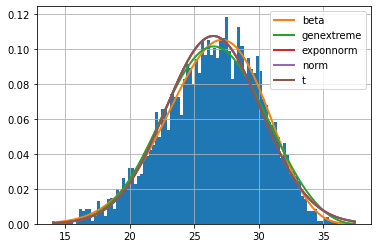

In [16]:
data5 = df[df['label']==5]['feature_6']
data8 = df[df['label']==8]['feature_6']
f5 = Fitter(data5, distributions = distributions_set)
f5.fit()
print(f"Summary for feature_6:")
print(f5.fitted_param)
f8 = Fitter(data8, distributions = distributions_set)
f8.fit()
print(f"Summary for feature_6:")
print(f8.fitted_param)
f5.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.007047,781.532778,-65470.690351,inf,0.010266,0.679681
gamma,0.007051,782.181913,-65467.911712,inf,0.010171,0.690823
beta,0.007077,786.158915,-65442.020473,inf,0.009935,0.718293
exponnorm,0.007482,773.273971,-65179.007814,inf,0.012752,0.403313
chi2,0.007489,783.687741,-65174.782609,inf,0.015302,0.202059


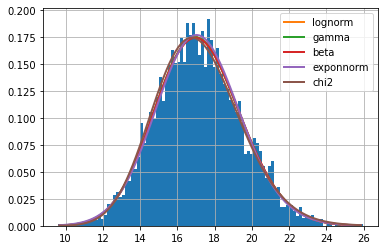

In [17]:
f8.summary()

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 13.55it/s]


Summary for feature_7:
{'expon': (0.0, 0.07635790042067454), 'norm': (0.07635790042067454, 0.3493296088131434), 'uniform': (0.0, 3.876641511917114), 'rayleigh': (-0.3368841838345707, 0.3826226573225656), 'cauchy': (-1.700169686959249e-21, 1.47583516839802e-21), 'powerlaw': (0.19368204557169927, -1.8171638949871987e-27, 7.404303183856539), 'arcsine': (-4.120612386864863e-29, 4.028392732211341), 'gamma': (0.18209530465635715, -3.5676337908988216e-31, 1.2578160890947014), 'cosine': (0.6037833133420849, 1.0423761716117195), 'chi2': (1.526467485390488, -1.1100161804116318e-29, 0.3013960932174009), 'exponpow': (0.22034727229514178, -2.0593214844815177e-28, 1.624064137887415), 'beta': (0.4894176208554678, 528.8948875881285, -8.432597378635565e-30, 27.729951939576868), 'pareto': (10.55653956004084, -3.976786033696632e-16, 3.974578743890031e-16), 'weibull_min': (0.4842954015269516, -4.188292285464711e-30, 0.004216817776208049), 't': (2.12061351424372, 7.819581685539402e-21, 1.6270827679470246e-

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 16.98it/s]

Summary for feature_7:
{'expon': (1.0789282321929932, 8.154651551637237), 'norm': (9.23357978383023, 2.1530408968525774), 'uniform': (1.0789282321929932, 13.410577535629272), 'rayleigh': (13.58362880773136, 3.4320920452300614), 'cauchy': (9.460423388262724, 1.3176073274207605), 'powerlaw': (2.0989015043382686, -0.06890803796351724, 14.558413808463083), 'cosine': (8.625233235025274, 2.404328355962323), 'beta': (10.586087198388766, 4.794197634050963, -3.7116162756647, 18.80749352724721), 'gamma': (279.1189765624788, -27.182738356433433, 0.13041713898710716), 'dweibull': (1.2795362059880253, 9.27716815371042, 1.8561750561560033), 'arcsine': (1.078928232192993, 13.410595958502046), 'chi2': (464.32481987528274, -24.101141375541715, 0.07180468739289558), 'weibull_max': (2.652849700227608, 14.555201290897601, 5.988932231424206), 'exponnorm': (0.0005136038677457902, 9.232471509149985, 2.153041393443094), 'weibull_min': (6.272345358310096, -2.279157000469765, 12.385373921737049), 'exponpow': (3

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,149.176146,7624.865286,-15292.118927,inf,0.921094,0.0
expon,243.130943,4566.470952,-13111.304988,inf,0.921094,0.0
exponnorm,243.481322,4565.461289,-13096.414477,inf,0.919811,0.0
weibull_min,302.385373,3328.964423,-12121.651967,inf,0.921094,0.0
gamma,372.416672,705.836440,-11184.460593,inf,0.921091,0.0


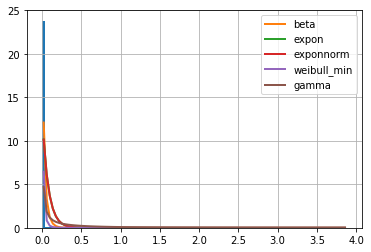

In [18]:
data5 = df[df['label']==5]['feature_7']
data8 = df[df['label']==8]['feature_7']
f5 = Fitter(data5, distributions = distributions_set)
f5.fit()
print(f"Summary for feature_7:")
print(f5.fitted_param)
f8 = Fitter(data8, distributions = distributions_set)
f8.fit()
print(f"Summary for feature_7:")
print(f8.fitted_param)
f5.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.011094,694.582249,-63252.065448,inf,0.009353,0.784053
weibull_min,0.011477,682.404839,-63095.206778,inf,0.012714,0.407090
exponweib,0.011662,693.708113,-63008.876420,inf,0.012232,0.456085
genextreme,0.012693,695.497314,-62604.804685,inf,0.017877,0.087830
weibull_max,0.012693,695.497286,-62604.750625,inf,0.017878,0.087811


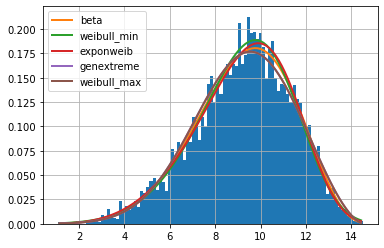

In [19]:
f8.summary()

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 13.73it/s]


Summary for feature_8:
{'expon': (0.0, 0.06597921971391509), 'norm': (0.06597921971391509, 0.3112673744719895), 'uniform': (0.0, 3.4638397693634038), 'rayleigh': (-0.30061784353726595, 0.3400593956907206), 'cauchy': (-1.700169686959249e-21, 1.47583516839802e-21), 'powerlaw': (0.19368204741054418, -1.320290223656664e-27, 6.615860598217315), 'gamma': (0.1683771839106309, -3.144104234821708e-30, 1.1655290762638026), 'arcsine': (-3.7756083849528755e-26, 3.599431850037335), 'cosine': (0.537946922449956, 0.9318743839902757), 'chi2': (1.5264675732537354, -5.793157943800745e-30, 0.2685565734686045), 'exponpow': (0.22034677170847822, -2.9917662886594315e-29, 1.4471094338982495), 'beta': (0.11519992942043017, 197.06722892055205, -4.692324490715444e-28, 9.02517108799017), 'weibull_min': (0.4842973548198437, -2.001384404865932e-30, 0.003758233463565028), 'pareto': (2.372314985588625, -1.100434307795592e-19, 1.090168835479088e-19), 'weibull_max': (15142.141926230819, 1004.3411054179905, 1004.333136

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 19.60it/s]

Summary for feature_8:
{'expon': (1.3028340339660645, 7.361044966300835), 'norm': (8.663879000266899, 2.1023131260767953), 'uniform': (1.3028340339660645, 12.543025493621826), 'rayleigh': (5.6190271811860875, 2.616375649656841), 'cauchy': (8.843376931203508, 1.3063814828671985), 'powerlaw': (1.9771324612883485, 0.049025962598429236, 13.796833567209035), 'cosine': (8.216441746151549, 2.203736031730443), 'beta': (8.971325076435694, 5.050466430998716, -2.196282945155472, 16.97370734454808), 'arcsine': (0.04762566261580989, 13.798233864972083), 'gamma': (299.9960174416051, -28.336690733821456, 0.12331258110110088), 'dweibull': (1.2974438415499456, 8.68058897018146, 1.8272639824238648), 'chi2': (232.74207901119036, -14.68837244209207, 0.10023512253189193), 'exponpow': (2.940230978507808, 1.192340382188319, 9.567539917997763), 'weibull_max': (2.7787960304283432, 14.076848823980423, 6.0805129789915515), 'pareto': (0.5370830104689923, 0.00020808044465659288, 1.3026259416597803), 'exponnorm': (

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponnorm,298.191417,4729.959739,-12184.487943,inf,0.921623,0.0
expon,298.908918,4710.211931,-12182.087162,inf,0.922649,0.0
weibull_min,383.145033,3310.759779,-11056.687732,inf,0.922649,0.0
exponweib,422.053134,645.910625,-10613.143541,inf,0.922649,0.0
gamma,477.046967,690.428981,-10070.500828,inf,0.922638,0.0


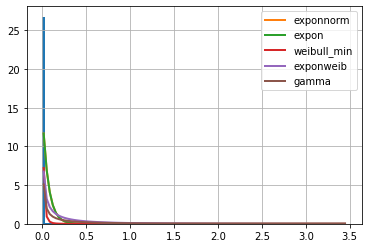

In [20]:
data5 = df[df['label']==5]['feature_8']
data8 = df[df['label']==8]['feature_8']
f5 = Fitter(data5, distributions = distributions_set)
f5.fit()
print(f"Summary for feature_8:")
print(f5.fitted_param)
f8 = Fitter(data8, distributions = distributions_set)
f8.fit()
print(f"Summary for feature_8:")
print(f8.fitted_param)
f5.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.011127,655.411705,-63237.678660,inf,0.007301,0.955783
exponweib,0.011171,654.627246,-63218.323582,inf,0.009332,0.786252
weibull_min,0.011245,648.093645,-63194.616089,inf,0.010893,0.605954
weibull_max,0.012167,651.981076,-62810.752422,inf,0.012209,0.458551
genextreme,0.012168,651.979545,-62810.483838,inf,0.012212,0.458220


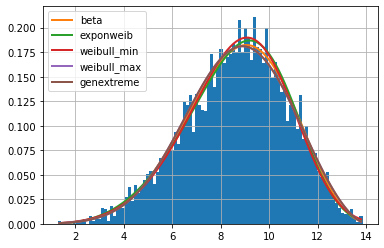

In [21]:
f8.summary()

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:02<00:00, 13.49it/s]


Summary for feature_9 5:
{'expon': (0.0, 0.10017324475085876), 'norm': (0.10017324475085876, 0.43788289751644166), 'uniform': (0.0, 5.164404392242432), 'rayleigh': (-0.4206626108245676, 0.4811504028837454), 'cauchy': (4.431924687045795e-25, 5.885445139323644e-24), 'powerlaw': (0.1936820944765753, -1.6534581505716837e-28, 9.863903005848723), 'arcsine': (-5.676667947134052e-28, 5.36656511461779), 'gamma': (0.1866936674019008, -2.106952134798758e-30, 1.5571280860580505), 'cosine': (0.8057857303075457, 1.3881874953751883), 'chi2': (1.5264675832398584, -6.703662954869589e-29, 0.3777984429544353), 'exponpow': (0.2203470922268911, -1.3518894818160621e-29, 2.035756170110405), 'beta': (0.3018378051146521, 204.95938188638956, -5.830462692881626e-28, 14.121254271955308), 'pareto': (2.9029958285990087, -2.0566863136480035e-18, 2.0325644111064715e-18), 'weibull_min': (0.48446166893894105, -2.758249786651206e-31, 0.005324165375160912), 't': (2.1212919059532958, 8.127294096151833e-22, 7.1071237484966

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 18.63it/s]

{'expon': (1.1168434619903564, 8.93745666919756), 'norm': (10.054300131187917, 2.4193436689834202), 'uniform': (1.1168434619903564, 14.985253095626831), 'rayleigh': (9.966567992130525, 1.7118587437159853), 'cauchy': (10.365854326885536, 1.4913084706855213), 'powerlaw': (2.015879158464819, -0.09788484496613253, 16.19998140333358), 'cosine': (9.406821889116102, 2.6414335393716253), 'gamma': (263.6153072736836, -30.013099579647353, 0.1518857682460522), 'beta': (11.521370998879878, 4.714787658503679, -5.612409026730443, 22.07673041172474), 'arcsine': (1.1168434619903562, 14.993002540869593), 'chi2': (266.90315417407726, -18.792612680597244, 0.10789497756032398), 'weibull_max': (2.7003268422306284, 16.134087932871015, 6.841548341084968), 'exponpow': (3.241706002765037, 0.9027537714364062, 11.501383005079818), 'dweibull': (1.281439577607728, 10.256205851743221, 2.090355037472552), 'weibull_min': (6.974431964105484, -4.189942508855282, 15.239802471242186), 'pareto': (0.4631427732045553, 0.000

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,124.769430,8737.920273,-16095.911703,inf,0.912647,0.0
exponnorm,131.062274,4753.220685,-15882.949535,inf,0.911506,0.0
expon,132.184480,4699.301977,-15853.002935,inf,0.912647,0.0
weibull_min,170.258272,3481.370359,-14705.813406,inf,0.912647,0.0
gamma,203.889442,778.528929,-13894.817535,inf,0.912644,0.0


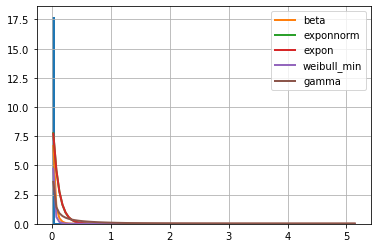

In [22]:
data5 = df[df['label']==5]['feature_9']
data8 = df[df['label']==8]['feature_9']
f5 = Fitter(data5, distributions = distributions_set)
f5.fit()
print(f"Summary for feature_9 5:")
print(f5.fitted_param)
f8 = Fitter(data8, distributions = distributions_set)
f8.fit()

print(f8.fitted_param)
f5.summary()

Summary for feature_9 8:


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.008829,715.151558,-64364.218177,inf,0.009548,0.762409
exponweib,0.008901,713.965758,-64325.066801,inf,0.009203,0.800228
weibull_min,0.010033,697.677810,-63750.297304,inf,0.015863,0.170415
exponpow,0.010768,721.070099,-63405.616380,inf,0.019130,0.055852
genextreme,0.012852,712.313772,-62544.150918,inf,0.022196,0.016220


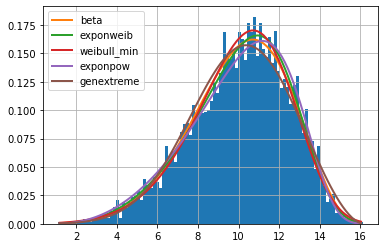

In [23]:
print(f"Summary for feature_9 8:")
f8.summary()

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 15.60it/s]


Summary for feature_10 5:
{'expon': (14.13982391357422, 12.919097740137728), 'norm': (27.05892165371195, 3.7532686134776565), 'uniform': (14.13982391357422, 23.190914154052734), 'rayleigh': (17.95885245637877, 6.960541813722856), 'cauchy': (27.448450499581362, 2.3527219971457134), 'powerlaw': (1.0113981239404048, 14.139750471320713, 23.19098791512991), 'cosine': (26.294328421053933, 3.874516288350888), 'exponpow': (2.9395726490874914, 13.855963690992287, 16.89349803378285), 'beta': (14.752993151276618, 6.344337461684533, 0.19547176413440231, 38.414647855420824), 'gamma': (312.35642061217436, -40.62308085653967, 0.21668247129251095), 'arcsine': (14.139823913574219, 23.190914154052738), 'dweibull': (1.3189128641283145, 27.088718054503637, 3.28078734737538), 'chi2': (158.4564347676715, -7.055888834770663, 0.2151464783518653), 'exponnorm': (3.766376708787614e-05, 27.05874713183893, 3.7532890581859135), 'weibull_min': (5.951000477588575, 7.949074913621873, 20.61787960045136), 'pareto': (1.5

Fitting 27 distributions: 100%|█████████████████████████████████████| 27/27 [00:01<00:00, 20.35it/s]

{'expon': (9.284360885620115, 8.205788155205076), 'norm': (17.49014904082519, 2.653934545772235), 'uniform': (9.284360885620115, 17.639499664306648), 'rayleigh': (11.870778275129927, 4.394354126353146), 'cauchy': (17.312132360898055, 1.6362609601228035), 'cosine': (17.99525676736308, 2.8453890251046032), 'powerlaw': (0.9892961875130188, 9.284138136047545, 17.63972248111218), 'gamma': (99.19696020942615, -8.951714921205767, 0.26655921480716505), 'exponpow': (2.29962950089751, 9.2667747508359, 11.096858308971836), 'arcsine': (9.28344024615114, 17.640420303775624), 'beta': (13.845098170675762, 23.795453696568618, 4.909051227341973, 34.20438254255524), 'dweibull': (1.2906221985174846, 17.561700191048025, 2.298729605671385), 'exponnorm': (0.4534640943072864, 16.393079232297065, 2.419255004437428), 'weibull_min': (3.44037899223017, 9.116502058828871, 9.309030842658913), 'chi2': (147.0732593098425, -5.332880052605558, 0.15516934069147298), 'pareto': (1.610671442433695, -0.014672373463420065, 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.004564,795.962209,-62057.948035,inf,0.010798,0.666393
weibull_min,0.004843,782.334788,-61799.131146,inf,0.012713,0.457511
exponweib,0.005284,778.998864,-61398.479957,inf,0.014965,0.263366
exponpow,0.005826,811.623242,-60967.752193,inf,0.020005,0.053853
genextreme,0.006364,790.812921,-60570.565699,inf,0.021113,0.035713


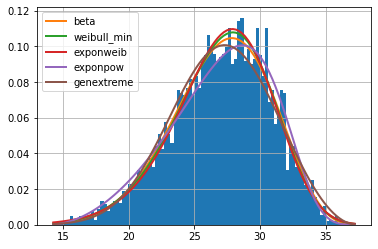

In [24]:
data5 = df[df['label']==5]['feature_10']
data8 = df[df['label']==8]['feature_10']
f5 = Fitter(data5, distributions = distributions_set)
f5.fit()
print(f"Summary for feature_10 5:")
print(f5.fitted_param)
f8 = Fitter(data8, distributions = distributions_set)
f8.fit()

print(f8.fitted_param)
f5.summary()

Summary for feature_10 8:


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genextreme,0.005688,770.041964,-66514.449291,inf,0.008613,0.859595
chi2,0.005986,754.344191,-66266.044595,inf,0.010222,0.684856
beta,0.006118,765.982274,-66151.312005,inf,0.012364,0.442391
gamma,0.006160,754.570993,-66126.221565,inf,0.010814,0.615187
lognorm,0.006201,754.020269,-66094.031237,inf,0.011054,0.587222


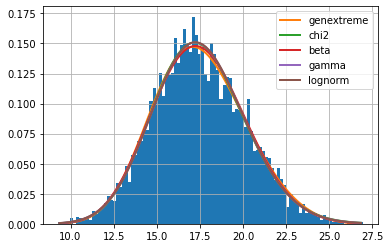

In [26]:
print(f"Summary for feature_10 8:")
f8.summary()

In [27]:
distributions_set

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform',
 'beta',
 'arcsine',
 'cosine',
 'expon',
 'weibull_max',
 'weibull_min',
 'dweibull',
 't',
 'pareto',
 'exponnorm',
 'lognorm',
 'norm',
 'exponweib',
 'weibull_max',
 'weibull_min',
 'pareto',
 'genextreme']